### Bifurcation Diagrams for Figure 1 and 2: Price of Anarchy, NeurIPS 2020


In [1]:
%pylab inline
from scipy.optimize import brentq

#a = \alpha, b = \beta
a = 10; b = 0.7;    

def f_MWUe(x,a): 
    """
    Compute the Multiplicative weight update on the input population x, with parameter a
    """
    if x <= 0.5:
         u = 1/2*(1 - numpy.sqrt(1 - 4/(1 + numpy.sqrt(1 + (1/numpy.sqrt(x) - 1/numpy.sqrt(1 - x) + a*(x - b))**2))**2))
    else:
        u = 1/2*(1 + numpy.sqrt(1 - 4/(1 + numpy.sqrt(1 + (1/numpy.sqrt(x) - 1/numpy.sqrt(1 - x) + a*(x - b))**2))**2))
    return u
    
def Iterate(x0, N, a, g=f_MWUe):
    """
    Iterate the function g(x,eta) N times, starting at x=x0.
    Return g(g(...(g(x))...)). Used to find a point on the attractor
    starting from some arbitrary point x0.
    """
    for i in range(N):
        x0 = g(x0,a)
    return x0



Populating the interactive namespace from numpy and matplotlib


In [3]:
def IterateList(x,a,Niter=10,Nskip=0,g=f_MWUe):
    """
    Iterate the function g(x, eta) Niter-1 times, starting at x 
    (or at x iterated Nskip times), so that the full trajectory 
    contains N points.
    Returns the entire list
    (x, g(x), g(g(x)), ... g(g(...(g(x))...))).

    Can be used to explore the dynamics starting from an arbitrary point
    x0, or to explore the attractor starting from a point x0 on the
    attractor (say, initialized using Nskip).

    For example, you can use Iterate to find a point xAttractor on the
    attractor and IterateList to create a long series of points attractorXs
    (thousands, or even millions long, if you're in the chaotic region),
    and then use
        pylab.hist(attractorXs, bins=500, normed=1)
        pylab.show()
    to see the density of points.
    """
    x = Iterate(x,Nskip,a,g)
    xs = [x]
    for i in range(Niter-1):
        x = g(x,a)
        xs.append(x)
    return xs

In [4]:
def BifurcationDiagram(aMin= 4, aMax=20, deltaa=0.001, g=f_MWUe, x0=0.49, Nskip=200, Niter=300):
    figure(figsize=(50,20))
    xlim((aMin,aMax))
    epsArray = arange(aMin, aMax, deltaa)
    ass = []
    trajs = []
    for a in epsArray:
        ass.extend([a]*Niter)
        trajs.extend(IterateList(x0,a,Niter,Nskip,g))
    scatter(ass, trajs, marker = '.', s=0.5, alpha = 0.75, c = '#ee2e31')
    # #071e22 
    #plot the superstable point 1/2 \pm \sqrt(1/4-1/mu)
    #xstable = 0.5+numpy.sqrt(1./4.-1./eta)
    plot([aMin,aMax],[b,b],'g-')
    setp(axes().get_xticklabels(),fontsize=40)
    setp(axes().get_yticklabels(),fontsize=40)
    ylabel('x', fontsize=40)

Color Scheme  #071e22 #1d7874    #f4c095    #ee2e31

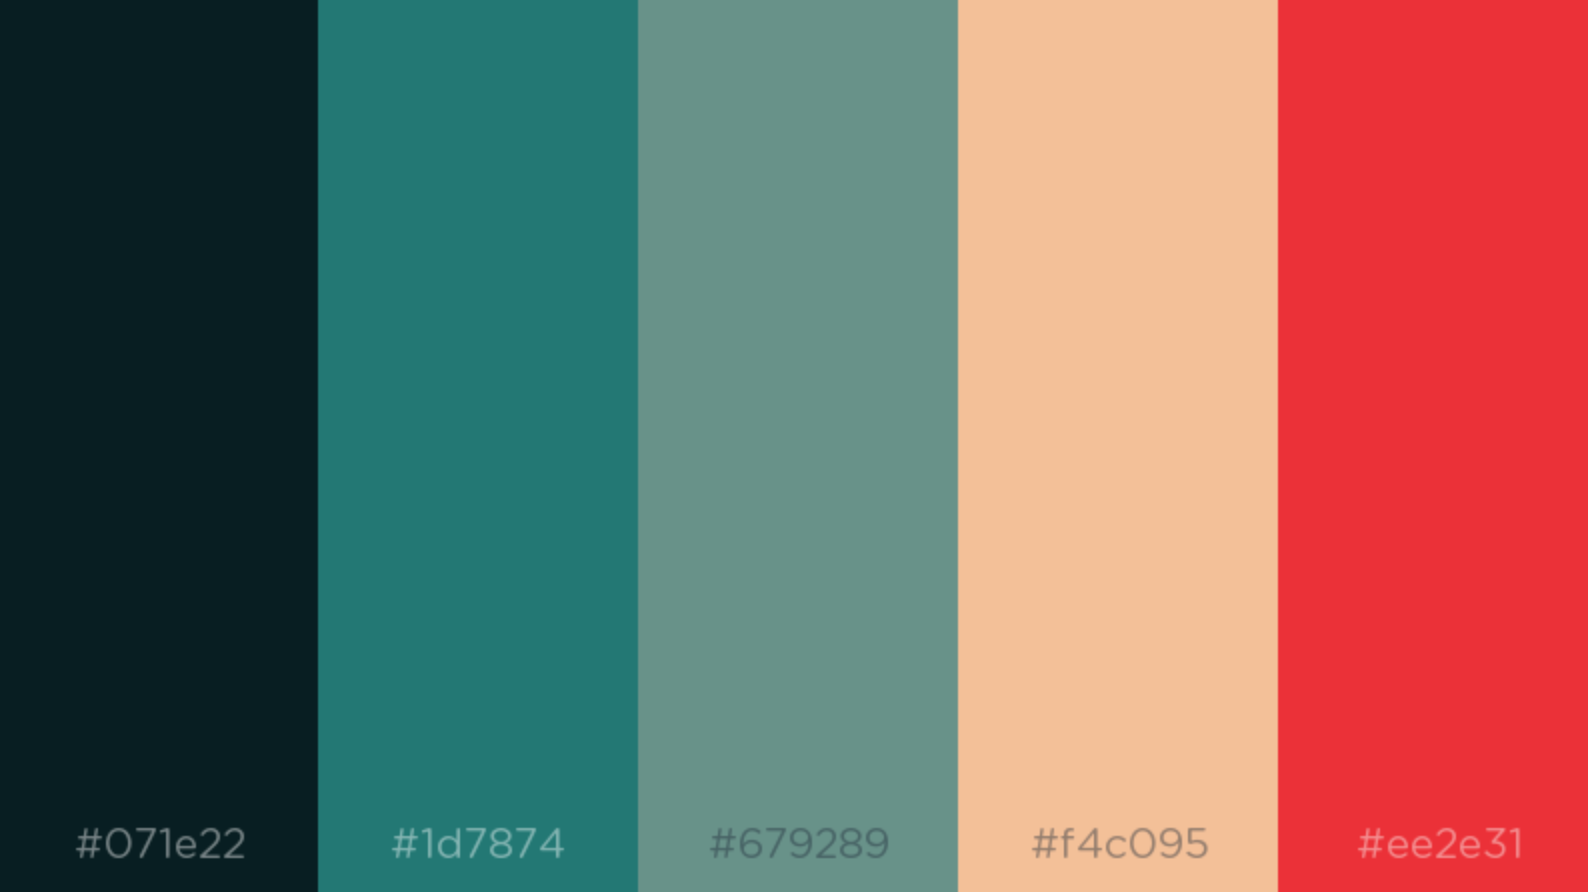

In [17]:
b = 0.8;

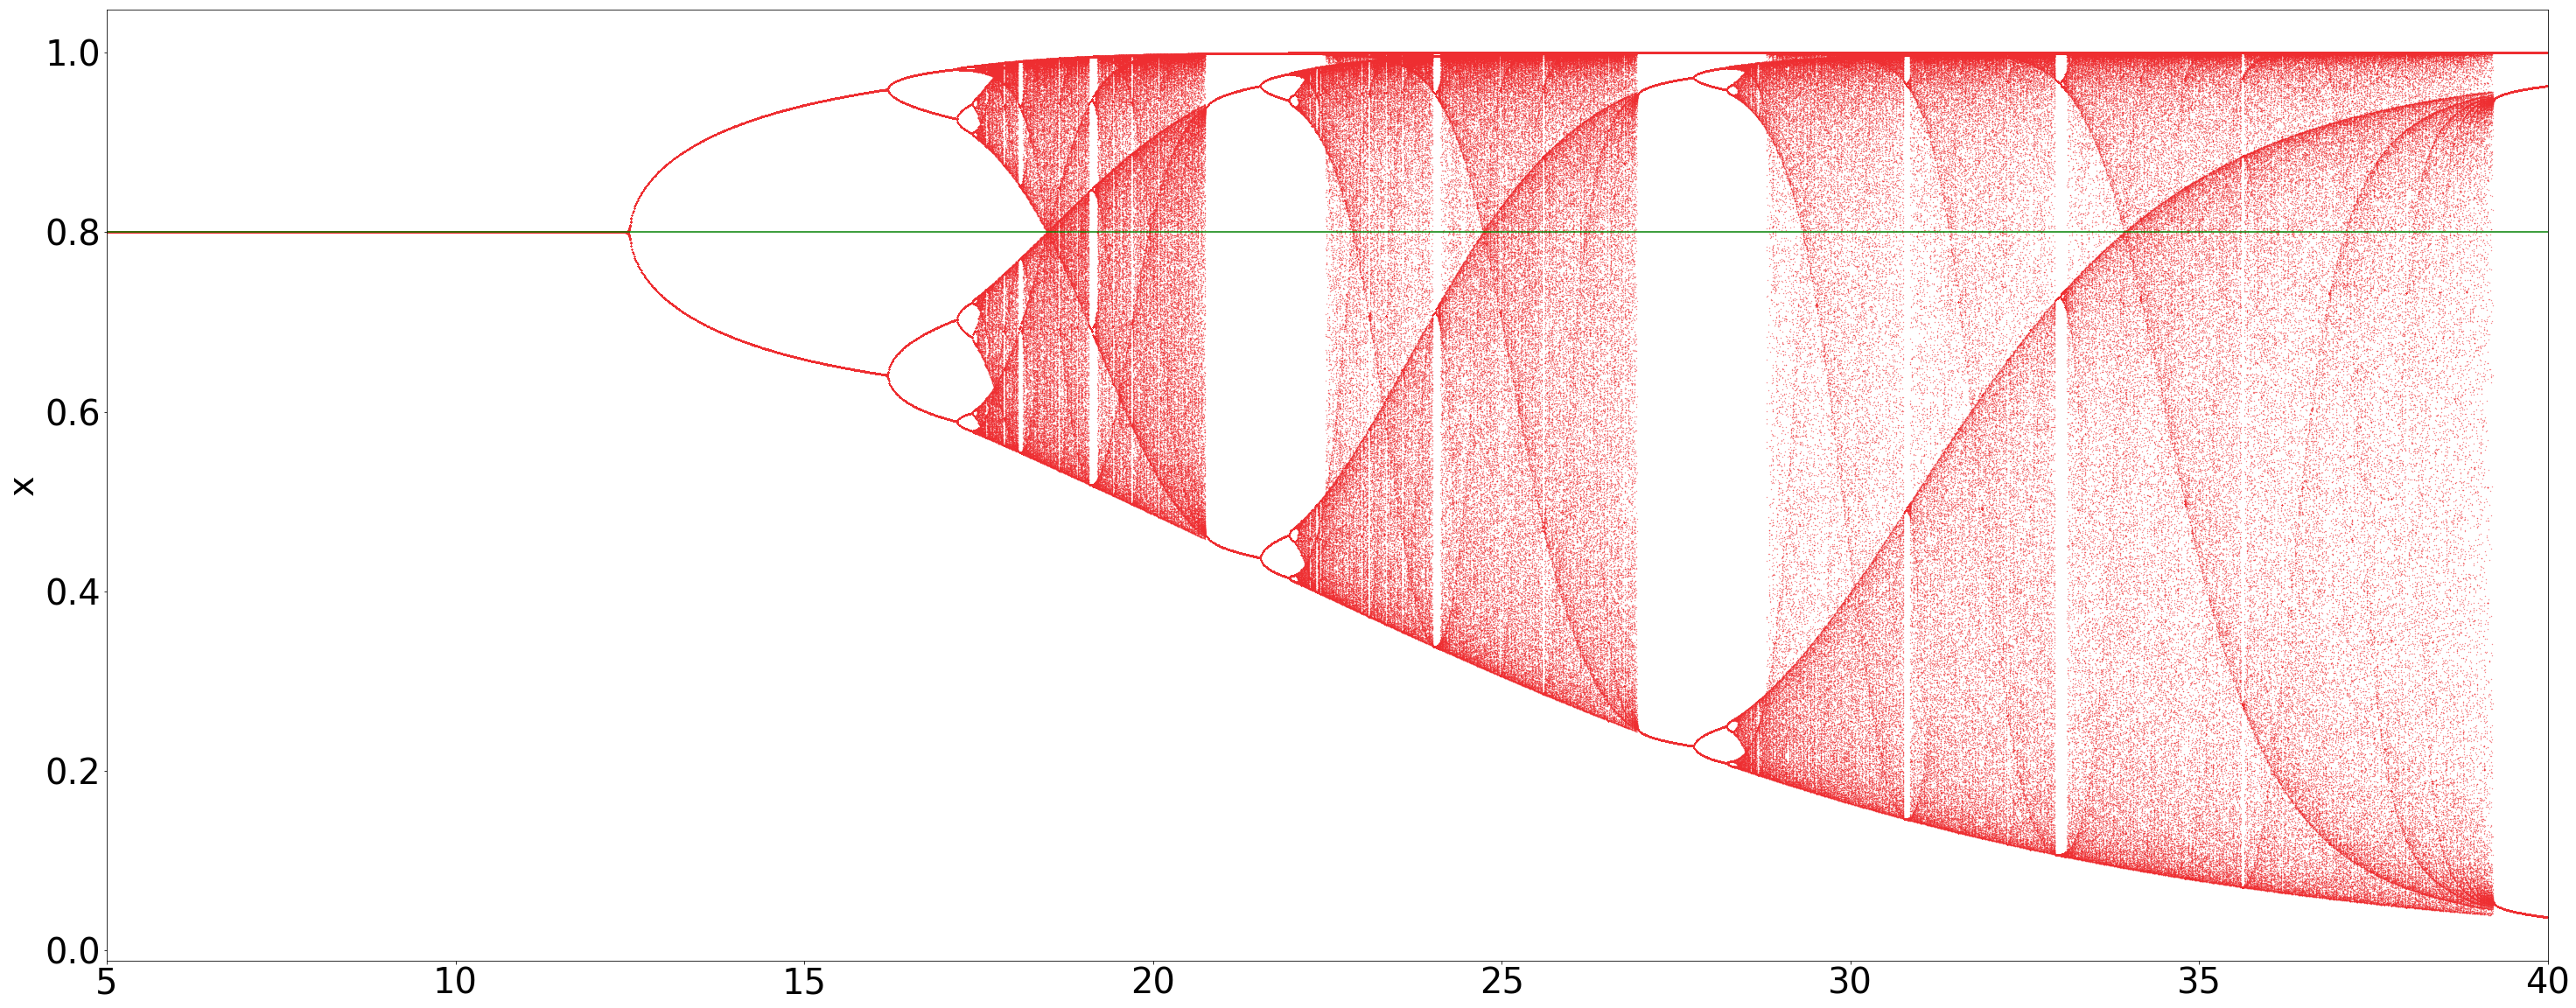

In [18]:
BifurcationDiagram(aMin=5, aMax=40, deltaa=0.01, g=f_MWUe, x0=0.49, Nskip=500, Niter=500)

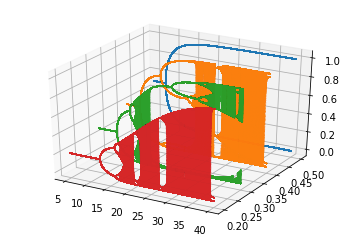

In [6]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

aMin=5 
aMax=40
deltaa=0.01 
x0=0.49
Nskip=500
Niter=500
g=f_MWUe

########
b = 0.5
aArray = arange(aMin, aMax, deltaa)
as1 = []
trajs1 = []

for eta in aArray:
    as1.extend([eta]*Niter)
    trajs1.extend(IterateList(x0,eta,Niter,Nskip,g))

########
b = 0.4

as2 = []
trajs2 = []

for eta in aArray:
    as2.extend([eta]*Niter)
    trajs2.extend(IterateList(x0,eta,Niter,Nskip,g))

########
b = 0.3

as3 = []
trajs3 = []

for eta in aArray:
    as3.extend([eta]*Niter)
    trajs3.extend(IterateList(x0,eta,Niter,Nskip,g))

########
b = 0.2

as4 = []
trajs4 = []

for eta in aArray:
    as4.extend([eta]*Niter)
    trajs4.extend(IterateList(x0,eta,Niter,Nskip,g))  
    
ax.scatter(as1, [0.5] * len(trajs1), trajs1, marker = '.', s=0.1, alpha = 0.6)
ax.scatter(as2, [0.4] * len(trajs2), trajs2, marker = '.', s=0.1, alpha = 0.6)
ax.scatter(as3, [0.3] * len(trajs3), trajs3, marker = '.', s=0.1, alpha = 0.6)
ax.scatter(as4, [0.2] * len(trajs4), trajs4, marker = '.', s=0.1, alpha = 0.6)




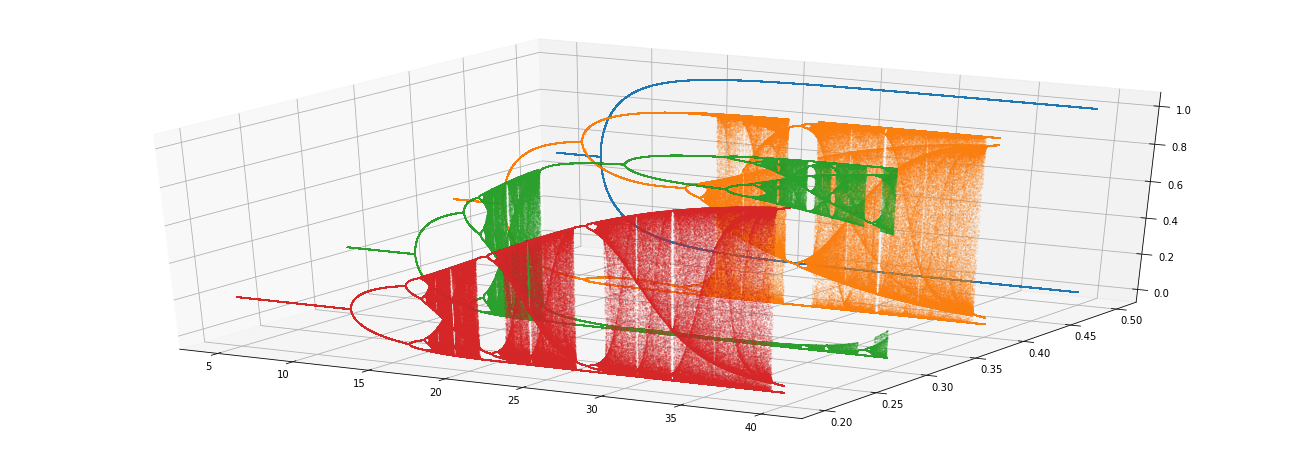

In [18]:
fig = plt.figure(figsize=plt.figaspect(0.35)*2) #Adjusts the aspect ratio and enlarges the figure (text does not enlarge)
ax = fig.gca(projection='3d')

ax.scatter(as1, [0.5] * len(trajs1), trajs1, marker = '.', s=0.1, alpha = 0.6)
ax.scatter(as2, [0.4] * len(trajs2), trajs2, marker = '.', s=0.1, alpha = 0.6)
ax.scatter(as3, [0.3] * len(trajs3), trajs3, marker = '.', s=0.1, alpha = 0.6)
ax.scatter(as4, [0.2] * len(trajs4), trajs4, marker = '.', s=0.1, alpha = 0.6)



Plot b > 0.5

In [6]:
aMin=5 
aMax=40
deltaa=0.01 
x0=0.49
Nskip=300
Niter=200
g=f_MWUe

########
b = 0.5
aArray = arange(aMin, aMax, deltaa)
as1 = []
trajs1 = []

for eta in aArray:
    as1.extend([eta]*Niter)
    trajs1.extend(IterateList(x0,eta,Niter,Nskip,g))

########
b = 0.6

as2 = []
trajs2 = []

for eta in aArray:
    as2.extend([eta]*Niter)
    trajs2.extend(IterateList(x0,eta,Niter,Nskip,g))

########
b = 0.7

as3 = []
trajs3 = []

for eta in aArray:
    as3.extend([eta]*Niter)
    trajs3.extend(IterateList(x0,eta,Niter,Nskip,g))

########
b = 0.8

as4 = []
trajs4 = []

for eta in aArray:
    as4.extend([eta]*Niter)
    trajs4.extend(IterateList(x0,eta,Niter,Nskip,g))  

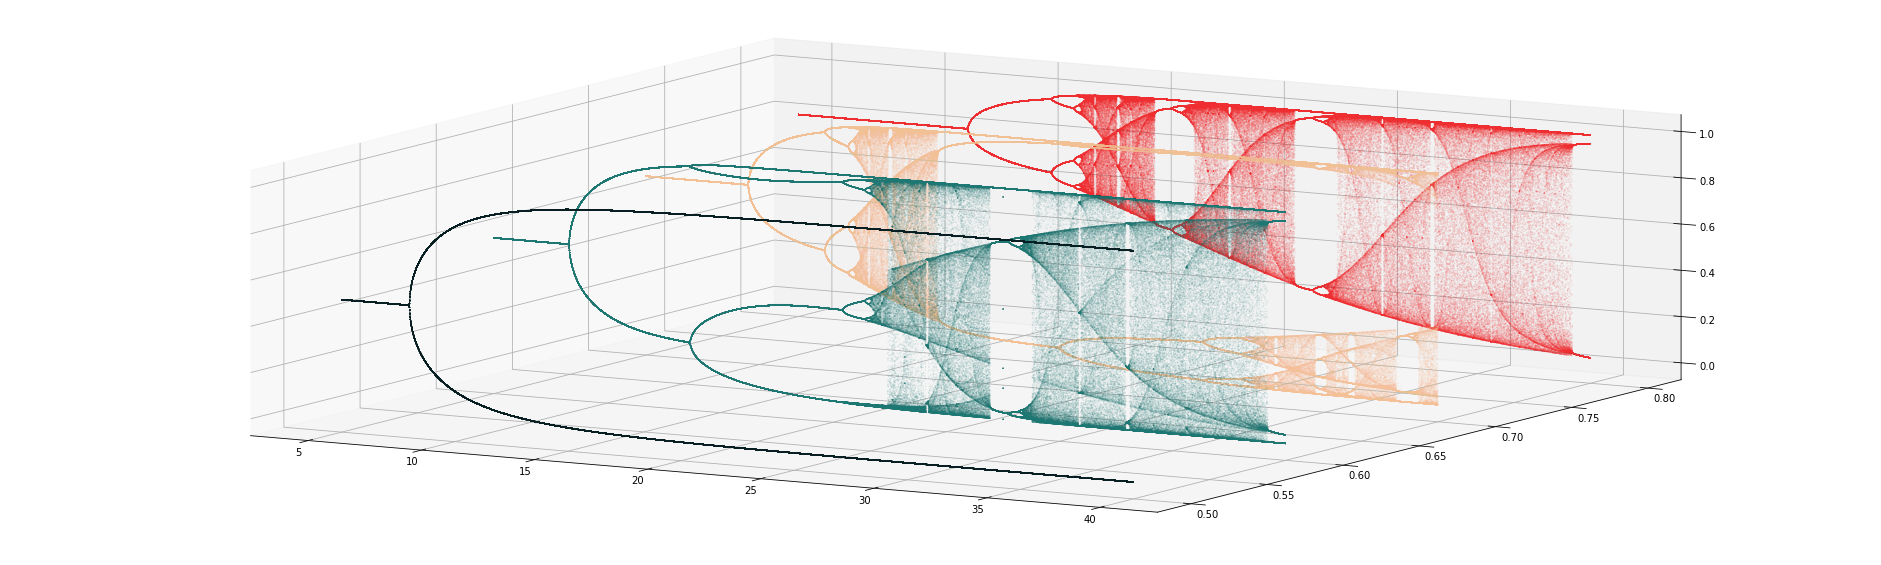

In [12]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=plt.figaspect(0.3)*2.5) #Adjusts the aspect ratio and enlarges the figure (text does not enlarge)
ax = fig.gca(projection='3d')

#This line of codes fix the perspective to orthogonal projections
from mpl_toolkits.mplot3d import proj3d
def orthogonal_proj(zfront, zback):
    a = (zfront+zback)/(zfront-zback)
    b = -2*(zfront*zback)/(zfront-zback)
    return numpy.array([[1,0,0,0],
                        [0,1,0,0],
                        [0,0,a,b],
                        [0,0,-0.0001,zback]])
proj3d.persp_transformation = orthogonal_proj
# ax.view_init(50, 300)

ax.scatter(as1, [0.5] * len(trajs1), trajs1, marker = '.', c = '#071e22', s=0.1, alpha = 0.3)
ax.scatter(as2, [0.6] * len(trajs2), trajs2, marker = '.', c = '#1d7874', s=0.1, alpha = 0.3)
ax.scatter(as3, [0.7] * len(trajs3), trajs3, marker = '.', c = '#f4c095', s=0.1, alpha = 0.3)
ax.scatter(as4, [0.8] * len(trajs4), trajs4, marker = '.', c = '#ee2e31', s=0.1, alpha = 0.3)

#Color Palette HEX code from https://www.color-hex.com/color-palette/78641